# LIBRARY

In [324]:
!pip install PySastrawi

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

# A. CRAWLING DATA

In [326]:
df = pd.read_csv('data_real.csv', index_col=0)
df.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [327]:
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# B. LABELING

In [328]:
label = []
for index, row in df_copy.iterrows():
    if row["Rating"] == 1 or row["Rating"] == 2:
        label.append(0)
    else :
      label.append(1)

In [329]:
df_copy["label"] = label

In [330]:
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [331]:
df_copy.tail()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
995,1017,Bagus dan memuaskan. Packing bagus cepat,4,pertukangan,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,221298191,408,1114588,https://www.tokopedia.com/indahjayatools/stapl...,1
996,1018,Mantap pengiriman ok cepat recomended,5,pertukangan,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,221298191,408,1114588,https://www.tokopedia.com/indahjayatools/stapl...,1
997,1019,Pengiriman cepat. Lumayan,4,pertukangan,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,221298191,408,1114588,https://www.tokopedia.com/indahjayatools/stapl...,1
998,1020,belom dicoba semoga oke barangnya,4,pertukangan,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,221298191,408,1114588,https://www.tokopedia.com/indahjayatools/stapl...,1
999,1021,"Barang cukup bagus, Respon bagus. Tapi gak ada...",3,pertukangan,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,221298191,408,1114588,https://www.tokopedia.com/indahjayatools/stapl...,1


# C. PREPOCESSING TEKS

In [332]:
def casefolding(Review):
  Review = Review.lower()
  return Review

df_copy['Ulasan'] = df_copy['Ulasan'].apply(casefolding)
df_copy.head()


,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [333]:
#Mengubah text menjadi lower
df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()

In [334]:
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# C1. NORMALISASI

In [335]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: normalisasi(x))


In [336]:
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# C2. STOPWORDD


In [337]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)


def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(x))
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


# C3. TOKENIZE

In [338]:
tokenized = df_copy['Ulasan'].apply(lambda x: x.split())

In [339]:
tokenized

,Ulasan
0,"[pesanan, sesuai, yg, gambar]"
1,"[pengiriman, respon, super, cepat., tpi, baran..."
2,"[barang, yg, dikirim, sesuai, pesanan]"
3,"[php,, bilang, isi, diseskripsi, pas, dipesen,..."
4,"[barang, jelek, copot&#34;, tmpat, taro, isinya]"
...,...
995,"[bagus, memuaskan., packing, bagus, cepat]"
996,"[mantap, pengiriman, ok, cepat, rekomen, ed]"
997,"[pengiriman, cepat., lumayan]"
998,"[belom, dicoba, semoga, oke, barangnya]"


# D. STEMMING

In [340]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()



pesan sesuai yg gambar
kirim respon super cepat tpi barang sesuai gambar kuat tembus jok motor
barang yg kirim sesuai pesan
php bilang isi skripsi pas sen beda mubajir rp50 000 isi ga cocok
barang jelek copot 34 tmpat taro isi
beli staples gak jual isi pake ckckck
ngirim barang periksa gan kondisi barang layak gak gitu loh isi karat semua
produk sesuai order prohex yg kirim
barang sdh terima
masang jok gak pake
barang cacat gak harus sblum kirim coba
kecewa dipakey isiya kluar 2 3 buah papan nggak nempel
barang bagus kirim pakai pos sekali
hasil staples rapat bidang produk cacat hadeeuh
barang standart aja bagus 
barang rusak kecewa berat
beli 5 bs pakai
straples gk bs dipake udh coba berkali2 bwt pasang jaring nyamuk straples tembak bah triplek aja gk nembus udh diketok2 palu lgi 
harga juga susah dipake hehe staples gak nancep sampe oenuh
gagal
ggdjkkjfkghfyhdjhugfvkchzndfjhadfafhjkkiutff
seller komunikatif niat pake instant courier biar sampai tp barang kirim 2 kabar sekali ga beran

,Ulasan
0,pesan sesuai yg gambar
1,kirim respon super cepat tpi barang sesuai gam...
2,barang yg kirim sesuai pesan
3,php bilang isi skripsi pas sen beda mubajir rp...
4,barang jelek copot 34 tmpat taro isi


# D1. Menggabungkan kedua atribut

In [341]:
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('data_real.csv')
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [342]:
result.head()

,Ulasan,label
0,pesan sesuai yg gambar,0
1,kirim respon super cepat tpi barang sesuai gam...,0
2,barang yg kirim sesuai pesan,0
3,php bilang isi skripsi pas sen beda mubajir rp...,0
4,barang jelek copot 34 tmpat taro isi,0


# E. Menghitung Kata Dengan  TF-IDF

In [343]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [344]:
Ulasan = result['Ulasan']

In [345]:
Ulasan.isnull().sum()

np.int64(7)

In [346]:
Ulasan = Ulasan.fillna('Tidak ada komentar')

In [347]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

2783


In [348]:
term_fit.vocabulary_

{'pesan': 1932,
 'sesuai': 2260,
 'yg': 2770,
 'gambar': 896,
 'kirim': 1276,
 'respon': 2110,
 'super': 2432,
 'cepat': 555,
 'tpi': 2618,
 'barang': 297,
 'kuat': 1346,
 'tembus': 2509,
 'jok': 1145,
 'motor': 1632,
 'php': 1938,
 'bilang': 400,
 'isi': 1084,
 'skripsi': 2317,
 'pas': 1875,
 'sen': 2238,
 'beda': 344,
 'mubajir': 1644,
 'rp50': 2140,
 '000': 1,
 'ga': 882,
 'cocok': 585,
 'jelek': 1126,
 'copot': 604,
 '34': 69,
 'tmpat': 2592,
 'taro': 2483,
 'beli': 355,
 'staples': 2390,
 'gak': 893,
 'jual': 1152,
 'pake': 1854,
 'ckckck': 571,
 'ngirim': 1723,
 'periksa': 1928,
 'gan': 901,
 'kondisi': 1315,
 'layak': 1396,
 'gitu': 939,
 'loh': 1447,
 'karat': 1199,
 'semua': 2237,
 'produk': 1999,
 'order': 1819,
 'prohex': 2003,
 'sdh': 2200,
 'terima': 2525,
 'masang': 1540,
 'cacat': 511,
 'harus': 1000,
 'sblum': 2195,
 'coba': 582,
 'kecewa': 1220,
 'dipakey': 740,
 'isiya': 1085,
 'kluar': 1290,
 'buah': 472,
 'papan': 1867,
 'nggak': 1721,
 'nempel': 1691,
 'bagus': 258

In [349]:
# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak katanya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)

print(term_frequency_all)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13993 stored elements and shape (1925, 2783)>
  Coords	Values
  (0, 896)	1
  (0, 1932)	1
  (0, 2260)	1
  (0, 2770)	1
  (1, 297)	1
  (1, 555)	1
  (1, 896)	1
  (1, 1145)	1
  (1, 1276)	1
  (1, 1346)	1
  (1, 1632)	1
  (1, 2110)	1
  (1, 2260)	1
  (1, 2432)	1
  (1, 2509)	1
  (1, 2618)	1
  (2, 297)	1
  (2, 1276)	1
  (2, 1932)	1
  (2, 2260)	1
  (2, 2770)	1
  (3, 1)	1
  (3, 344)	1
  (3, 400)	1
  (3, 585)	1
  :	:
  (1924, 544)	2
  (1924, 719)	1
  (1924, 880)	1
  (1924, 893)	2
  (1924, 901)	1
  (1924, 941)	1
  (1924, 969)	1
  (1924, 1004)	1
  (1924, 1426)	1
  (1924, 1532)	1
  (1924, 1666)	1
  (1924, 1756)	1
  (1924, 1858)	1
  (1924, 1878)	1
  (1924, 1944)	1
  (1924, 2110)	1
  (1924, 2176)	1
  (1924, 2200)	1
  (1924, 2227)	1
  (1924, 2307)	1
  (1924, 2448)	3
  (1924, 2508)	1
  (1924, 2582)	1
  (1924, 2617)	1
  (1924, 2701)	1


In [350]:
ulasan_tf = Ulasan[1]

print(ulasan_tf)


kirim respon super cepat tpi barang sesuai gambar kuat tembus jok motor


In [351]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (1, 2783)>
  Coords	Values
  (0, 297)	1
  (0, 555)	1
  (0, 896)	1
  (0, 1145)	1
  (0, 1276)	1
  (0, 1346)	1
  (0, 1632)	1
  (0, 2110)	1
  (0, 2260)	1
  (0, 2432)	1
  (0, 2509)	1
  (0, 2618)	1


In [352]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.87005341 7.87005341 7.87005341 ... 7.87005341 7.87005341 7.87005341]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12 stored elements and shape (1, 2783)>
  Coords	Values
  (0, 297)	0.1051362802807371
  (0, 555)	0.16432853043840337
  (0, 896)	0.23291200180119767
  (0, 1145)	0.40567105519321517
  (0, 1276)	0.15323781996366787
  (0, 1346)	0.32065382841286344
  (0, 1632)	0.40567105519321517
  (0, 2110)	0.20511196961849615
  (0, 2260)	0.13613036189834246
  (0, 2432)	0.3348592514769469
  (0, 2509)	0.40567105519321517
  (0, 2618)	0.3390481677443736


# F. VISUALISASI(NLP)

In [353]:
train_s0 = df_copy[df_copy["label"] == 0 ]

In [354]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("Tidak ada komentar")

/tmp/ipython-input-2869945235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan"] = train_s0["Ulasan"].fillna("Tidak ada komentar")


In [355]:
train_s0.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [356]:
from wordcloud import wordcloud

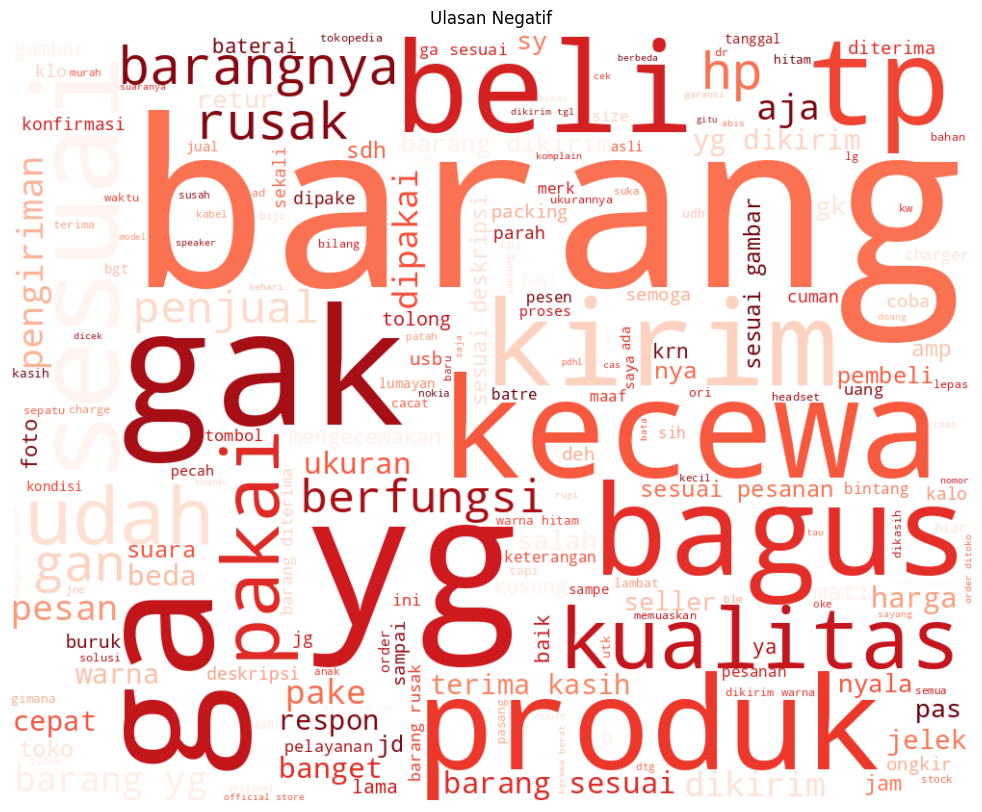

In [357]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap="Reds", width=1000, height=800, mode="RGBA", background_color="white").generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [358]:
train_s1 = df_copy[df_copy["label"] == 1 ]

In [359]:
train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")

/tmp/ipython-input-2675054923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")


In [360]:
train_s1.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,1,barang sesuai pesanan cepat,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,1
1,2,barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
2,3,paket rapi...mantap....cepat....sampe tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
3,4,puas barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,1
4,5,responya mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,1


In [361]:
from wordcloud import wordcloud

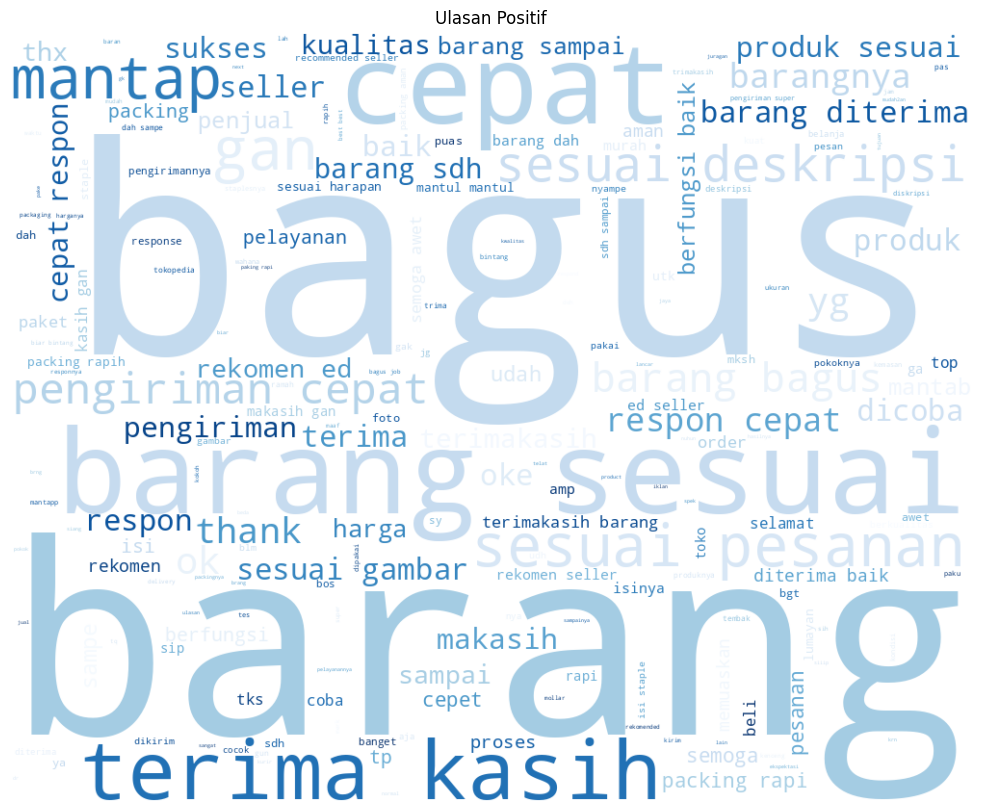

In [362]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap="Blues", width=1000, height=800, mode="RGBA", background_color="white").generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

/tmp/ipython-input-2131972501.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy["label"], sort=True)


Text(0, 0.5, 'Jumlah')

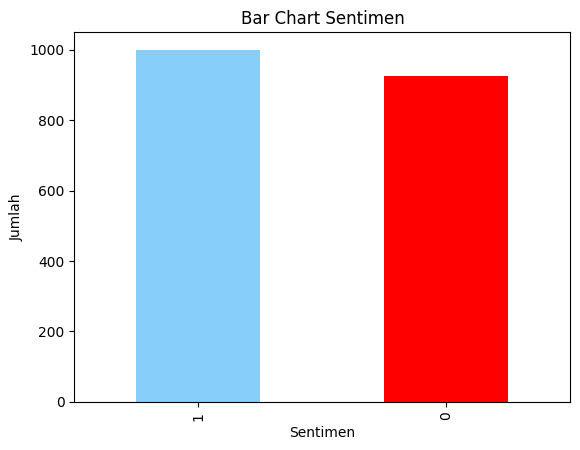

In [363]:
sentimen_data = pd.value_counts(df_copy["label"], sort=True)
sentimen_data.plot(kind="bar", color=['lightskyblue', 'red'])
plt.title("Bar Chart Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

# G. SPLIT DATA (TF-IDF)

In [364]:
result['Ulasan'] = result['Ulasan'].fillna("Tidak ada komentar")

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
x_train, x_test, y_train, y_test = train_test_split(result['Ulasan'], result['label'], test_size=0.1, stratify=result['label'],random_state=30 )

In [367]:
import numpy as np

In [368]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [369]:
x_train =  Vectorizer.fit_transform(x_train)
x_test = Vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(1732, 2646)
(193, 2646)


In [370]:
x_train = x_train.toarray()

In [371]:
x_test = x_test.toarray()

# H. MACHINE LEARNING (NAIVE BAYES CLASSIFIER)

In [372]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [373]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing' : np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method, verbose=1, scoring='accuracy')

gscv_nb.fit(x_train, y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': np.float64(0.004328761281083057)}

In [374]:
nb = GaussianNB(var_smoothing=0.004328761281083057)
nb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.004328761281083057)

In [375]:
y_pred_nb = nb.predict(x_test)

# I. CONFUSION MATRIX

In [376]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay

In [377]:
print('-------confusion matrix-------')
print(confusion_matrix(y_test,y_pred_nb))


print('-------classification report-------')
print(classification_report(y_test,y_pred_nb))

-------confusion matrix-------
[[68 25]
 [10 90]]
-------classification report-------
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        93
           1       0.78      0.90      0.84       100

    accuracy                           0.82       193
   macro avg       0.83      0.82      0.82       193
weighted avg       0.83      0.82      0.82       193



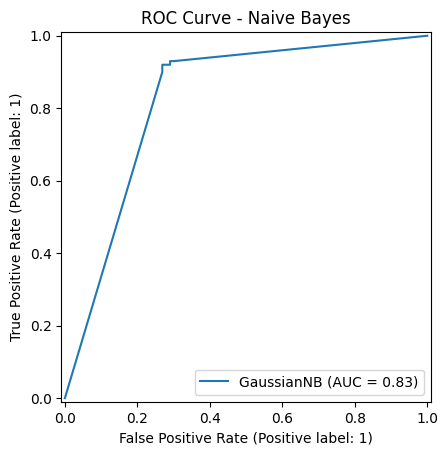

In [378]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Gunakan RocCurveDisplay sebagai pengganti plot_roc_curve
RocCurveDisplay.from_estimator(nb, x_test, y_test)
plt.title("ROC Curve - Naive Bayes")
plt.show()